# Assignment 02: Data Processing 

This week's assignment is to prepare a dataset for a machine learning algorithm that can accurately identify wines types.  

**Before starting copy this file and work on your own copy by going to File > Save Copy in Drive. Then add your name to the file (e.g., Assignment 02: Data Processing - Muntadher Alkaabi)**

**Note: the submission deadline is : 1/27/2022 at 3:00 PM**


Requirements:

1.   Read CSV file into a DataFrame.
2.   Print the `describe` and `info` of the DataFrame.
3.   Drop the columns (Unnamed, designation, Region_2, Taster_name, Taster_twitter_handle, Title, and Province).
4. Fill in the missing values in `price` using the mean value of each column and in `point` using the median value of each column.
5. Drop the rows that have missing values in the following columns (description, region_1, variety, country, winery)
6. Convert the text to integer vector in column  `description`
7. Convert text values to numerical values in (Country, Region_1, Variety, Winery).
8. Split the data into inputs/features (x) and output/target ( y ).
9. Print the `describe` and `info` of the dataset.
10. Plot the `histogram` for x and set the size of the plots to (10,10).
11. Save the modified DataFrame to a CSV file.


Dataset download [link](https://drive.google.com/file/d/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF/view?usp=sharing).



Upload your notebook file [here](https://forms.gle/PBDgHkJeb7mQZaXm7).​​​​​​​

Good luck and feel free to ask any questions on our Teams channels.


# Import Python Libraries 

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1- Read CSV file

In [237]:
# Downlowd the dataset 
!wget -O winemag-data-assignment-02.csv 'https://drive.google.com/u/0/uc?id=1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF&export=download'

--2022-01-27 11:05:19--  https://drive.google.com/u/0/uc?id=1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF&export=download
Resolving drive.google.com (drive.google.com)... 74.125.142.100, 74.125.142.139, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mu1sneetlmi2ugchusjbbcsr78o6hp0b/1643281500000/12354821778029633344/*/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF?e=download [following]
--2022-01-27 11:05:20--  https://doc-0k-1o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mu1sneetlmi2ugchusjbbcsr78o6hp0b/1643281500000/12354821778029633344/*/1LQAW9gQwIdwd3NXpqFAEEyamyU6kNrpF?e=download
Resolving doc-0k-1o-docs.googleusercontent.com (doc-0k-1o-docs.googleusercontent.com)... 74.125.195.132, 2607:f8b0:400e:c09::84
Connecting to doc-0k-1o-docs.googleusercontent.com (do

In [238]:
# Read the csv file 
df = pd.read_csv('winemag-data-assignment-02.csv')
print(df) 

      Unnamed: 0    country  ...             variety               winery
0              0      Italy  ...         White Blend              Nicosia
1              1   Portugal  ...      Portuguese Red  Quinta dos Avidagos
2              2         US  ...          Pinot Gris            Rainstorm
3              3         US  ...            Riesling           St. Julian
4              4         US  ...          Pinot Noir         Sweet Cheeks
...          ...        ...  ...                 ...                  ...
6154        6154  Australia  ...  Cabernet Sauvignon             Taltarni
6155        6155      Chile  ...           Red Blend              Antiyal
6156        6156     France  ...                Rosé    Mas des Bressades
6157        6157         US  ...     Sparkling Blend         Frank Family
6158        6158         US  ...           Zinfandel                 Hobo

[6159 rows x 14 columns]


# 2- Print the info of the DataFrame

In [239]:
#informations of the DataFream
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             6159 non-null   int64  
 1   country                6156 non-null   object 
 2   description            6159 non-null   object 
 3   designation            4324 non-null   object 
 4   points                 6132 non-null   float64
 5   price                  5737 non-null   float64
 6   province               6156 non-null   object 
 7   region_1               5176 non-null   object 
 8   region_2               2423 non-null   object 
 9   taster_name            4910 non-null   object 
 10  taster_twitter_handle  4707 non-null   object 
 11  title                  6159 non-null   object 
 12  variety                6159 non-null   object 
 13  winery                 6159 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 673.8+

In [240]:
# knowing how many missing values in the data
df.isnull().sum()

Unnamed: 0                  0
country                     3
description                 0
designation              1835
points                     27
price                     422
province                    3
region_1                  983
region_2                 3736
taster_name              1249
taster_twitter_handle    1452
title                       0
variety                     0
winery                      0
dtype: int64

# 3- Drop columns 
Drop the columns (Unnamed,Designation, Region_2, Taster_name, Taster_twitter_handle, Title,Province).

In [241]:
#create a list 
columns_list=['designation','region_2','taster_name', 'taster_twitter_handle', 'title','province']
#Drop the columns
df.drop(columns_list,axis=1,inplace=True)

In [242]:
df.drop(df.columns[0],axis=1,inplace=True)#drop column unnamed

In [243]:

print(df)

        country  ...               winery
0         Italy  ...              Nicosia
1      Portugal  ...  Quinta dos Avidagos
2            US  ...            Rainstorm
3            US  ...           St. Julian
4            US  ...         Sweet Cheeks
...         ...  ...                  ...
6154  Australia  ...             Taltarni
6155      Chile  ...              Antiyal
6156     France  ...    Mas des Bressades
6157         US  ...         Frank Family
6158         US  ...                 Hobo

[6159 rows x 7 columns]


In [244]:
df.info()#info a datafream

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6156 non-null   object 
 1   description  6159 non-null   object 
 2   points       6132 non-null   float64
 3   price        5737 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      6159 non-null   object 
 6   winery       6159 non-null   object 
dtypes: float64(2), object(5)
memory usage: 336.9+ KB


In [245]:
# checking missing values
df.isnull()
#knowling number of non-missing values for each variable
df.isnull().sum() 

country          3
description      0
points          27
price          422
region_1       983
variety          0
winery           0
dtype: int64

# 4- Fill in missing values 
Fill in missing values in (price) using the mean value of the column and in (point) using the median value of the column.

In [246]:
# fill in missing with a mean:
df['price'].fillna(df['price'].mean(),inplace=True)
print(df)


        country  ...               winery
0         Italy  ...              Nicosia
1      Portugal  ...  Quinta dos Avidagos
2            US  ...            Rainstorm
3            US  ...           St. Julian
4            US  ...         Sweet Cheeks
...         ...  ...                  ...
6154  Australia  ...             Taltarni
6155      Chile  ...              Antiyal
6156     France  ...    Mas des Bressades
6157         US  ...         Frank Family
6158         US  ...                 Hobo

[6159 rows x 7 columns]


In [247]:
# fill in missing with a median
df['points'].fillna(df['points'].median(),inplace=True)
print(df)

        country  ...               winery
0         Italy  ...              Nicosia
1      Portugal  ...  Quinta dos Avidagos
2            US  ...            Rainstorm
3            US  ...           St. Julian
4            US  ...         Sweet Cheeks
...         ...  ...                  ...
6154  Australia  ...             Taltarni
6155      Chile  ...              Antiyal
6156     France  ...    Mas des Bressades
6157         US  ...         Frank Family
6158         US  ...                 Hobo

[6159 rows x 7 columns]


In [248]:
# checking missing values
df.isnull()
df


,country,description,points,price,region_1,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87.0,34.633781,Etna,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87.0,15.000000,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87.0,14.000000,Willamette Valley,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87.0,13.000000,Lake Michigan Shore,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87.0,65.000000,Willamette Valley,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...
6154,Australia,The top Australian Cabernets retain distinct v...,89.0,32.000000,Pyrenees,Cabernet Sauvignon,Taltarni
6155,Chile,"Really good wine with blasting dark fruit, win...",89.0,30.000000,NaN,Red Blend,Antiyal
6156,France,Importer Bobby Kacher seemingly has a pipeline...,89.0,13.000000,Costières de Nîmes,Rosé,Mas des Bressades
6157,US,"With a ruby-crimson color, this sparkling wine...",89.0,35.000000,Napa Valley,Sparkling Blend,Frank Family


In [249]:
# Print the info od the DataFrame
df.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6159 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      6156 non-null   object 
 1   description  6159 non-null   object 
 2   points       6159 non-null   float64
 3   price        6159 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      6159 non-null   object 
 6   winery       6159 non-null   object 
dtypes: float64(2), object(5)
memory usage: 336.9+ KB


# 6- Convert the text to integer vector in column (description)

In [250]:
# Create the text dataset for the Tokenizer   
text= ' '.join(df.description)
class Tokenizer:

    def __init__(
        self,
        row_text,
        filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
        oov='<OOV>',
        ):
        """
        The __init__ method  of the class Tokenizer will get the following parameters
        row_text : the input text that we wnat to create the tokenizer from it.
        filters : a string where each element is a character that will be filtered from the texts. 
        The default is all punctuation, plus tabs and line breaks, minus the ' character.
        oov : if given, it will be added to word_index and used to replace out-of-vocabulary words during text_to_sequence calls
        """

        self.row_text = row_text
        self.filters = filters
        self.oov = oov

        # create the word to index and index to word dictionaries using the tokenizer method

        (self.word_index, self.index_word) = self.tokenizer(self.row_text)

    def clean_text(self, text):
        """
        The clean_text method will take one parameter text 
        then the method will clean the text data 
        and return clean text
        """

        text = text.lower()  # convert the texts to lowercase.

        # clean the text

        for i in text:
            if i in self.filters:

                text = text.replace(i, ' ')

        return text  # return the clean text

    def tokenizer(self, text):
        """
        The tokenizer method will take one parameter text 
        then the method will clean the text data. 
        extricate the unique words the method will return two dictionaries contains the unique word to index and the reverse of it.
        """

        # create the word to index dictionary

        word_index = {}

        # create the index to word dictionary

        index_word = {}

        # add the oov to the word to index & the index to word  dictionaries

        word_index[self.oov] = 0
        index_word[0] = self.oov

        # clean the text

        text = self.clean_text(text)

        # extract the unique values

        unique_words = list(set(text.split()))

        # convert the word to index and the reverse of it

        for (index, word) in enumerate(unique_words):
            word_index[word] = index + 1
            index_word[index + 1] = word

        # return word to index and the indeex to word dictionaries

        return (word_index, index_word)

    def tokenize(self, text):
        """
        the method tokenize will convert text to vector 
        text: the text paramater it's for the text that you want to convert to list of numbers
        """

        # create empty  list

        vector = []

        # clean the text

        text = self.clean_text(text)

        # split the text to words

        word_list = text.split()

        # convert the word list to

        for word in word_list:
            try:
                vector.append(self.word_index[word])
            except:
                vector.append(self.word_index[self.oov])

        # return the  vector

        return vector

    def reverse_tokenize(self, vector):
        """
        the method reverse_tokenize will convert vector  to text
        word_vector: the word_vector paramater it's for the list of number that you want to convert to string

        """

        word_list = []

        # convert from word_vector to string

        for index in vector:
            try:
                word_list.append(self.index_word[index])
            except:

                word_list.append(self.index_word[self.oov])
            text = ' '.join(word_list)

        # return the string

        return text



In [251]:
# create an object token
tokenizer_1=Tokenizer(text)

#used loop for rows
for i in range(len(df.description)):
   df.description[i]=tokenizer_1.tokenize(df.description[i])

   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [252]:
df

,country,description,points,price,region_1,variety,winery
0,Italy,"[6691, 3844, 4334, 2060, 5026, 3271, 6411, 806...",87.0,34.633781,Etna,White Blend,Nicosia
1,Portugal,"[5017, 7722, 5105, 6411, 4793, 2090, 827, 7432...",87.0,15.000000,NaN,Portuguese Red,Quinta dos Avidagos
2,US,"[2126, 6411, 3631, 153, 3793, 1847, 1721, 2909...",87.0,14.000000,Willamette Valley,Pinot Gris,Rainstorm
3,US,"[2113, 7034, 4866, 5438, 6411, 7463, 2109, 753...",87.0,13.000000,Lake Michigan Shore,Riesling,St. Julian
4,US,"[4876, 5313, 153, 3526, 3707, 4848, 4020, 5017...",87.0,65.000000,Willamette Valley,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...
6154,Australia,"[153, 4082, 1146, 7157, 7691, 8465, 5352, 8680...",89.0,32.000000,Pyrenees,Cabernet Sauvignon,Taltarni
6155,Chile,"[9726, 8153, 827, 3995, 1920, 8095, 2060, 2808...",89.0,30.000000,NaN,Red Blend,Antiyal
6156,France,"[2253, 7578, 3939, 3781, 4031, 2090, 7527, 579...",89.0,13.000000,Costières de Nîmes,Rosé,Mas des Bressades
6157,US,"[3995, 2090, 6865, 4100, 6455, 5017, 6518, 827...",89.0,35.000000,Napa Valley,Sparkling Blend,Frank Family


# 5- Drop the rows that have missing values in the flowing columns (description, region_1, variety, country, winery)

In [253]:
# Drop the rows that have missing values 
df.dropna(inplace=True)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5176 non-null   object 
 1   description  5176 non-null   object 
 2   points       5176 non-null   float64
 3   price        5176 non-null   float64
 4   region_1     5176 non-null   object 
 5   variety      5176 non-null   object 
 6   winery       5176 non-null   object 
dtypes: float64(2), object(5)
memory usage: 323.5+ KB


# 7- Convert text values to numerical values

In [255]:
df

,country,description,points,price,region_1,variety,winery
0,Italy,"[6691, 3844, 4334, 2060, 5026, 3271, 6411, 806...",87.0,34.633781,Etna,White Blend,Nicosia
2,US,"[2126, 6411, 3631, 153, 3793, 1847, 1721, 2909...",87.0,14.000000,Willamette Valley,Pinot Gris,Rainstorm
3,US,"[2113, 7034, 4866, 5438, 6411, 7463, 2109, 753...",87.0,13.000000,Lake Michigan Shore,Riesling,St. Julian
4,US,"[4876, 5313, 153, 3526, 3707, 4848, 4020, 5017...",87.0,65.000000,Willamette Valley,Pinot Noir,Sweet Cheeks
5,Spain,"[1971, 6411, 5183, 6691, 5659, 2090, 5384, 282...",87.0,15.000000,Navarra,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...
6152,France,"[5017, 5870, 8608, 450, 9602, 3995, 153, 7225,...",89.0,34.633781,Champagne,Chardonnay,Pascal Doquet
6154,Australia,"[153, 4082, 1146, 7157, 7691, 8465, 5352, 8680...",89.0,32.000000,Pyrenees,Cabernet Sauvignon,Taltarni
6156,France,"[2253, 7578, 3939, 3781, 4031, 2090, 7527, 579...",89.0,13.000000,Costières de Nîmes,Rosé,Mas des Bressades
6157,US,"[3995, 2090, 6865, 4100, 6455, 5017, 6518, 827...",89.0,35.000000,Napa Valley,Sparkling Blend,Frank Family


In [256]:
# Create function that return two dictionary word to index and the other index to word 
def string_to_numerics(column):
  set_column=set(column)
  index_word = {}
  word_index = {}

  # Get the unique words
 
  for i,w in enumerate(set_column):
    index_word[i]=w
    word_index[w]=i
  column=column.replace(word_index)
  print(index_word)  



  # Return word to index & index to word
  return column,word_index, index_word

In [257]:
# Create the string to numerics for the country col
df.country,country_word_index,country_index_word=string_to_numerics(df.country)
df.region_1,region_1_word_index,region_1_index_word=string_to_numerics(df.region_1)
df.variety,variety_word_index,variety_index_word=string_to_numerics(df.variety)
df.winery,winery_word_index,winery_index_word=string_to_numerics(df.winery)



{0: 'US', 1: 'Argentina', 2: 'Spain', 3: 'France', 4: 'Australia', 5: 'Canada', 6: 'Italy'}
{0: 'Tavel', 1: 'Sierra Foothills', 2: 'Mediterranée', 3: 'Valpolicella', 4: 'Falerio', 5: 'Coste della Sesia', 6: 'Condrieu', 7: 'Mendocino Ridge', 8: 'Côtes du Roussillon Villages Caramany', 9: 'Bianco di Custoza', 10: 'Chénas', 11: 'Pyrenees', 12: 'Gavi di Gavi', 13: 'Crémant de Limoux', 14: 'Bordeaux Blanc', 15: 'Calabria', 16: 'Calchaquí Valley', 17: 'Dundee Hills', 18: 'Piedmont', 19: 'San Antonio Valley', 20: 'Corse', 21: 'Alexander Valley', 22: 'Cannonau di Sardegna', 23: 'Niagara Peninsula', 24: 'Maury Sec', 25: 'Chehalem Mountains', 26: 'Santa Clara Valley', 27: 'Oltrepò Pavese', 28: 'Bonnezeaux', 29: 'Taburno', 30: 'Vin de Liqueur', 31: 'Coteaux Varois', 32: 'Bardolino Chiaretto', 33: 'Mount Veeder', 34: 'Mâcon-Fuissé', 35: 'Vi de la Terra Illes Balears', 36: 'St.-Romain', 37: 'Tasmania', 38: 'Fiddletown', 39: 'Neuquén', 40: 'Basilicata', 41: 'Puglia', 42: "Valle d'Aosta", 43: 'Chirou

In [258]:
df

,country,description,points,price,region_1,variety,winery
0,6,"[6691, 3844, 4334, 2060, 5026, 3271, 6411, 806...",87.0,34.633781,149,28,685
2,0,"[2126, 6411, 3631, 153, 3793, 1847, 1721, 2909...",87.0,14.000000,185,72,3009
3,0,"[2113, 7034, 4866, 5438, 6411, 7463, 2109, 753...",87.0,13.000000,261,124,2476
4,0,"[4876, 5313, 153, 3526, 3707, 4848, 4020, 5017...",87.0,65.000000,185,8,632
5,2,"[1971, 6411, 5183, 6691, 5659, 2090, 5384, 282...",87.0,15.000000,250,33,3321
...,...,...,...,...,...,...,...
6152,3,"[5017, 5870, 8608, 450, 9602, 3995, 153, 7225,...",89.0,34.633781,289,84,958
6154,4,"[153, 4082, 1146, 7157, 7691, 8465, 5352, 8680...",89.0,32.000000,11,173,621
6156,3,"[2253, 7578, 3939, 3781, 4031, 2090, 7527, 579...",89.0,13.000000,543,136,77
6157,0,"[3995, 2090, 6865, 4100, 6455, 5017, 6518, 827...",89.0,35.000000,407,38,2415


In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5176 non-null   int64  
 1   description  5176 non-null   object 
 2   points       5176 non-null   float64
 3   price        5176 non-null   float64
 4   region_1     5176 non-null   int64  
 5   variety      5176 non-null   int64  
 6   winery       5176 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 323.5+ KB


#Split tha Dataset to x,y 

# 8- Split the data into inputs/features (x) and output/target ( y ).

In [260]:
# split the data(target x)
y=df.iloc[:,6:].astype('int64')
print('target: ' ,y)

target:        winery
0        685
2       3009
3       2476
4        632
5       3321
...      ...
6152     958
6154     621
6156      77
6157    2415
6158     456

[5176 rows x 1 columns]


In [261]:
# split the (data feature x)
x=df.iloc[:,0:6]
print('feature' ,x)
# Write your code here


x

feature       country  ... variety
0           6  ...      28
2           0  ...      72
3           0  ...     124
4           0  ...       8
5           2  ...      33
...       ...  ...     ...
6152        3  ...      84
6154        4  ...     173
6156        3  ...     136
6157        0  ...      38
6158        0  ...     154

[5176 rows x 6 columns]


,country,description,points,price,region_1,variety
0,6,"[6691, 3844, 4334, 2060, 5026, 3271, 6411, 806...",87.0,34.633781,149,28
2,0,"[2126, 6411, 3631, 153, 3793, 1847, 1721, 2909...",87.0,14.000000,185,72
3,0,"[2113, 7034, 4866, 5438, 6411, 7463, 2109, 753...",87.0,13.000000,261,124
4,0,"[4876, 5313, 153, 3526, 3707, 4848, 4020, 5017...",87.0,65.000000,185,8
5,2,"[1971, 6411, 5183, 6691, 5659, 2090, 5384, 282...",87.0,15.000000,250,33
...,...,...,...,...,...,...
6152,3,"[5017, 5870, 8608, 450, 9602, 3995, 153, 7225,...",89.0,34.633781,289,84
6154,4,"[153, 4082, 1146, 7157, 7691, 8465, 5352, 8680...",89.0,32.000000,11,173
6156,3,"[2253, 7578, 3939, 3781, 4031, 2090, 7527, 579...",89.0,13.000000,543,136
6157,0,"[3995, 2090, 6865, 4100, 6455, 5017, 6518, 827...",89.0,35.000000,407,38


In [262]:
# Convert the dtype of points to int64

df.astype({'points': 'int64'}).dtypes

country          int64
description     object
points           int64
price          float64
region_1         int64
variety          int64
winery           int64
dtype: object

# 9-Print the Describe  and info of the dataset.

In [263]:
# Print the information of x 
df.info()
#describe
df.describe()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 5176 entries, 0 to 6158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      5176 non-null   int64  
 1   description  5176 non-null   object 
 2   points       5176 non-null   float64
 3   price        5176 non-null   float64
 4   region_1     5176 non-null   int64  
 5   variety      5176 non-null   int64  
 6   winery       5176 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 323.5+ KB


,country,points,price,region_1,variety,winery
count,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000,5176.000000
mean,1.958269,88.267388,36.352650,321.059505,101.776082,1689.998261
std,2.314040,2.924028,49.676917,170.122751,57.965789,979.163315
min,0.000000,80.000000,4.000000,0.000000,0.000000,0.000000
25%,0.000000,86.000000,18.000000,185.000000,63.000000,835.000000
50%,1.000000,88.000000,28.000000,323.000000,111.500000,1678.500000
75%,3.000000,90.000000,40.000000,446.250000,146.000000,2544.250000
max,6.000000,100.000000,1900.000000,612.000000,217.000000,3379.000000


# 10- Plot a (histogram) with set the size of the plots to (10,10).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7a257c8550>,
      dtype=object)

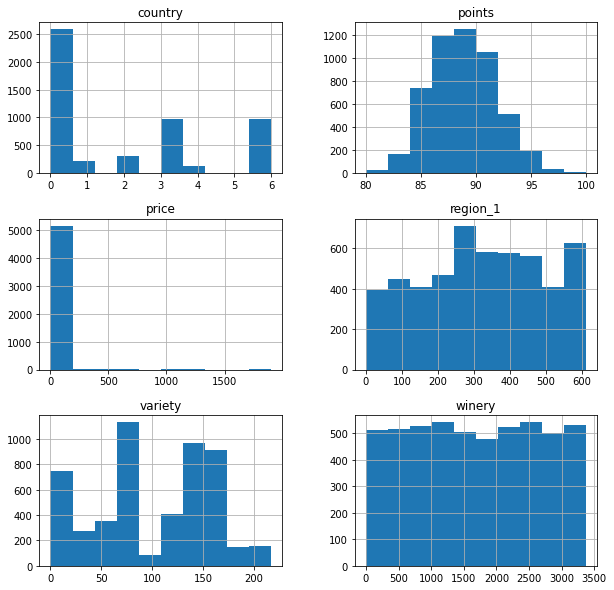

In [264]:
# Plot the histogram for the data frame
df.hist(figsize=(10,10))
# Write your code here



# 11- Save the modified DataFrame to a CSV file.


In [265]:
# Save the data frame plase make sure that the csv file saved without the index 
df.to_csv('/content/Assigement_2.csv',index=False)
# Write your code here



In [266]:
# Read the data frame that you saved to make sure everything is correct
assigement_2 = pd.read_csv('/content/Assigement_2.csv')
assigement_2

,country,description,points,price,region_1,variety,winery
0,6,"[6691, 3844, 4334, 2060, 5026, 3271, 6411, 806...",87.0,34.633781,149,28,685
1,0,"[2126, 6411, 3631, 153, 3793, 1847, 1721, 2909...",87.0,14.000000,185,72,3009
2,0,"[2113, 7034, 4866, 5438, 6411, 7463, 2109, 753...",87.0,13.000000,261,124,2476
3,0,"[4876, 5313, 153, 3526, 3707, 4848, 4020, 5017...",87.0,65.000000,185,8,632
4,2,"[1971, 6411, 5183, 6691, 5659, 2090, 5384, 282...",87.0,15.000000,250,33,3321
...,...,...,...,...,...,...,...
5171,3,"[5017, 5870, 8608, 450, 9602, 3995, 153, 7225,...",89.0,34.633781,289,84,958
5172,4,"[153, 4082, 1146, 7157, 7691, 8465, 5352, 8680...",89.0,32.000000,11,173,621
5173,3,"[2253, 7578, 3939, 3781, 4031, 2090, 7527, 579...",89.0,13.000000,543,136,77
5174,0,"[3995, 2090, 6865, 4100, 6455, 5017, 6518, 827...",89.0,35.000000,407,38,2415
